# Observations from Data:
From the data collected, I have noticed the following:
- Curiously, the only strong correlation in the graphs created is the one between Latitude and Max Temperature, which makes sense as going near the equator of the Earth the temperature will rise.
- Due to the spread out data from all the other graphs, it is implied that there are other outside sources that cause the variety in data, not just location on Earth.
- This is especially apparent with the "Cloudiness" graphs, as you can be near the equator and have no clouds, or near the topmost/bottomost part of the Earth and have full overcasts.

In [2]:
 # Dependencies and Setup (This was given to us)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from weather_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities (This was also given to us)
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [4]:
# (Creating lists to hold the data that will be collected, and starting API calls)
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0 # (These two are a counter to ensure that it does not go past the free 50 calls/min)
set_counter = 1

print("Beginning Data Retrieval...")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1): # ("enumerate" basically allows for more than one loop to happen at once)
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            time.sleep(60) # (This is to ensure that it does cause errors as the free version only allows 50 per minute)
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete!")
print("-----------------------------")

Beginning Data Retrieval...
-----------------------------
Processing Record 1 of Set 1 | lethem
Processing Record 2 of Set 1 | antalaha
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | roma
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | humboldt
City not found. Skipping...
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | port hardy
Processing Record 12 of Set 1 | nynashamn
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | tsumeb
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | santa lucia
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | skjervoy
Processing Record 

Processing Record 31 of Set 4 | isla mujeres
Processing Record 32 of Set 4 | novoselytsya
Processing Record 33 of Set 4 | axim
Processing Record 34 of Set 4 | masaguisi
Processing Record 35 of Set 4 | bredasdorp
Processing Record 36 of Set 4 | mapiripan
Processing Record 37 of Set 4 | nabire
Processing Record 38 of Set 4 | jiangyou
Processing Record 39 of Set 4 | tupik
Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | sakakah
Processing Record 42 of Set 4 | kurumkan
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | martinsburg
City not found. Skipping...
Processing Record 47 of Set 4 | pa sang
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | tarancon
Processing Record 50 of Set 4 | hambantota
Processing Record 0 of Set 5 | sept-iles
Processing Record 1 of Set 5 | north bend
Processing Record 2 of Set 5 | dzhebariki-khaya
Proc

Processing Record 16 of Set 8 | alexandria
Processing Record 17 of Set 8 | puri
Processing Record 18 of Set 8 | daru
Processing Record 19 of Set 8 | shache
Processing Record 20 of Set 8 | santa marinella
Processing Record 21 of Set 8 | manitouwadge
Processing Record 22 of Set 8 | kanniyakumari
Processing Record 23 of Set 8 | san andres
Processing Record 24 of Set 8 | iqaluit
Processing Record 25 of Set 8 | plettenberg bay
Processing Record 26 of Set 8 | yakeshi
Processing Record 27 of Set 8 | dalvik
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | racine
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | ahipara
Processing Record 35 of Set 8 | hinton
Processing Record 36 of Set 8 | ambon
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | minjur
Processing Record 39 of Set 8 | ust-koksa
City not found.

Processing Record 50 of Set 11 | kudahuvadhoo
Processing Record 0 of Set 12 | santa fe
Processing Record 1 of Set 12 | turbo
Processing Record 2 of Set 12 | akyab
Processing Record 3 of Set 12 | burgos
Processing Record 4 of Set 12 | abu dhabi
City not found. Skipping...
Processing Record 5 of Set 12 | labuhan
Processing Record 6 of Set 12 | ardabil
Processing Record 7 of Set 12 | bridgetown
Processing Record 8 of Set 12 | imperia
Processing Record 9 of Set 12 | chicama
Processing Record 10 of Set 12 | krasnoye
City not found. Skipping...
Processing Record 11 of Set 12 | mackenzie
-----------------------------
Data Retrieval Complete!
-----------------------------


In [10]:
# (Creating a Dataframe from the collected data)
weather_df = pd.DataFrame({ 
    "City": city_name_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Max Temperature": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
})

In [11]:
weather_df.count() # (To ensure that all the data was collected correctly)

City               572
Latitude           572
Longitude          572
Max Temperature    572
Humidity           572
Cloudiness         572
Wind Speed         572
Country            572
Date               572
dtype: int64

In [12]:
weather_df # (Displaying Dataframe)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lethem,3.3803,-59.7968,78.91,61,38,13.00,GY,1645154267
1,Antalaha,-14.9003,50.2788,74.61,88,85,6.78,MG,1645154267
2,Rikitea,-23.1203,-134.9692,78.31,71,7,7.70,PF,1645154267
3,Rome,43.2128,-75.4557,54.66,97,100,7.00,US,1645154200
4,Yellowknife,62.4560,-114.3525,-12.59,85,100,13.00,CA,1645154091
...,...,...,...,...,...,...,...,...,...
567,Bridgetown,13.1000,-59.6167,75.69,83,40,16.11,BB,1645155169
568,Provincia di Imperia,43.9667,7.7833,50.00,87,0,5.08,IT,1645155170
569,Chicama,-7.8447,-79.1469,72.14,75,98,4.50,PE,1645155170
570,Krasne,49.9145,24.6134,38.55,79,99,18.52,UA,1645155170


In [13]:
weather_df.to_csv("Output/cities.csv", index=False)

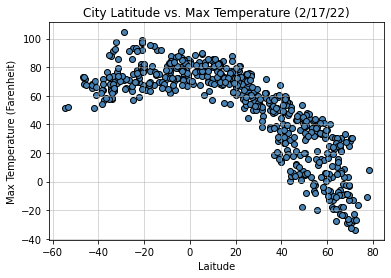

In [15]:
# (Creating a scatterplot showing latitude vs max temperature)
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (2/17/22)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Image Output/Latitude vs. Temperature.png")

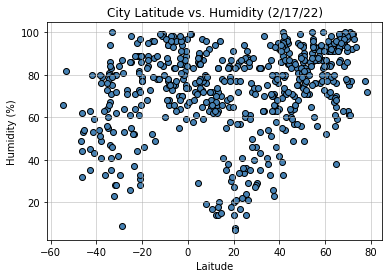

In [19]:
# (Creating a scatterplot showing latitude vs. humidity)
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (2/17/22)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Image Output/Latitude vs. Humidity.png")

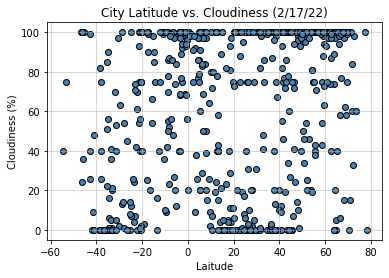

In [20]:
# (Creating a scatterplot showing latitude vs cloudiness)
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (2/17/22)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Image Output/Latitude vs. Cloudiness.png")

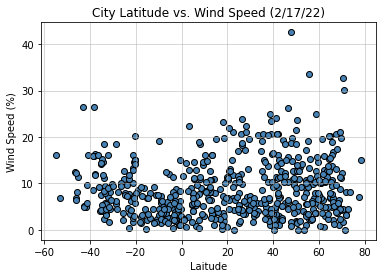

In [21]:
# (Creating a scatterplot showing latitude vs wind speed)
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (2/17/22)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Image Output/Latitude vs. Wind Speed.png")

In [22]:
# (Creating a linear regression function)
hemisphere_north = weather_df.loc[weather_df["Latitude"] >= 0]
hemisphere_south = weather_df.loc[weather_df["Latitude"] < 0]

def linear_regression(x,y):
    print(f"The r-value is : {st.pearsonr(x, y)[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b): # (This is used to print the slope function on the graph)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-value is : -0.8709382863997821


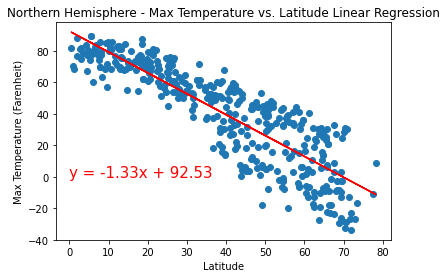

In [24]:
# (Creating a scatterplot of a latitude vs max temperature in the northern hemisphere with a regression line)
equation = linear_regression(hemisphere_north["Latitude"], hemisphere_north["Max Temperature"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.savefig("Image Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-value is : 0.37736036215850666


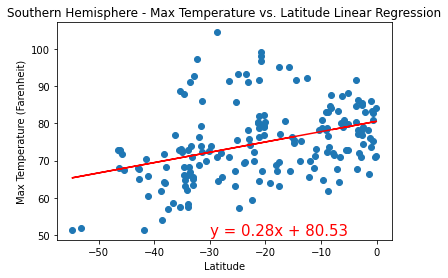

In [26]:
# (Creating a scatterplot of a latitude vs max temperature in the southern hemisphere with a regression line)
equation = linear_regression(hemisphere_south["Latitude"], hemisphere_south["Max Temperature"])
annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.savefig("Image Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-value is : 0.37087602301047706


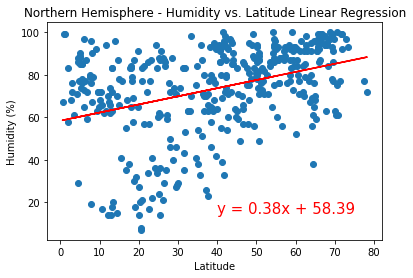

In [28]:
# (Creating a scatterplot of a latitude vs humidity in the northern hemisphere with a regression line)
equation = linear_regression(hemisphere_north["Latitude"], hemisphere_north["Humidity"])
annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Image Output/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-value is : 0.444760053337478


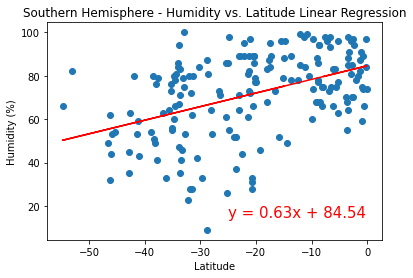

In [32]:
# (Creating a scatterplot of a latitude vs humidity in the southern hemisphere with a regression line)
equation = linear_regression(hemisphere_south["Latitude"], hemisphere_south["Humidity"])
annotate(equation, -25, 15)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Image Output/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-value is : 0.2762053127042895


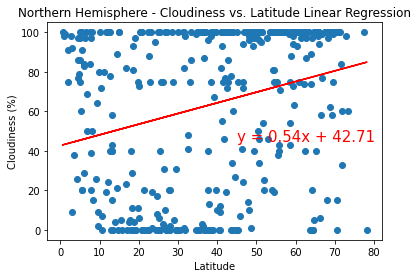

In [36]:
# (Creating a scatterplot of a latitude vs cloudiness in the northern hemisphere with a regression line)
equation = linear_regression(hemisphere_north["Latitude"], hemisphere_north["Cloudiness"])
annotate(equation, 45, 45)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Image Output/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-value is : 0.44501058639795704


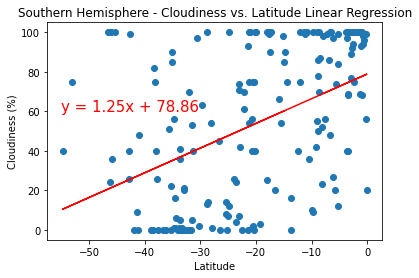

In [40]:
# (Creating a scatterplot of a latitude vs cloudiness in the southern hemisphere with a regression line)
equation = linear_regression(hemisphere_south["Latitude"], hemisphere_south["Cloudiness"])
annotate(equation, -55, 60)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Image Output/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-value is : 0.08159951153362806


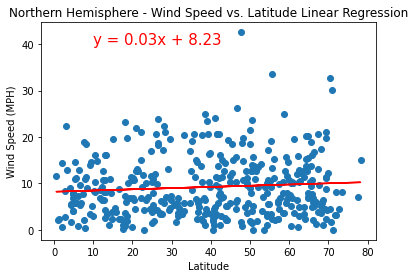

In [43]:
# (Creating a scatterplot of a latitude vs wind speed in the northern hemisphere with a regression line)
equation = linear_regression(hemisphere_north["Latitude"], hemisphere_north["Wind Speed"])
annotate(equation, 10, 40)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Image Output/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-value is : -0.42387206633665186


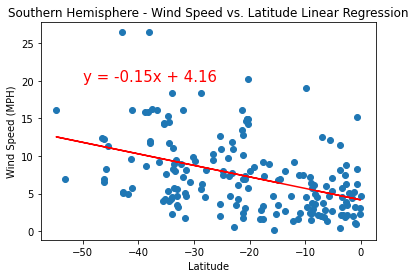

In [45]:
# (Creating a scatterplot of a latitude vs wind speed in the southern hemisphere with a regression line)
equation = linear_regression(hemisphere_south["Latitude"], hemisphere_south["Wind Speed"])
annotate(equation, -50, 20)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Image Output/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")